In [21]:
library(tidyverse)
library(repr)
library(tidymodels)

In [44]:
tennis_data = read_csv("https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn") %>%
    select(tourney_level, winner_ht, loser_ht, winner_age, loser_age, minutes) %>%
    na.omit() %>% 
    rename(match_length = minutes)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  tourney_id = col_character(),
  tourney_name = col_character(),
  surface = col_character(),
  tourney_level = col_character(),
  winner_seed = col_character(),
  winner_entry = col_character(),
  winner_name = col_character(),
  winner_hand = col_character(),
  winner_ioc = col_character(),
  loser_seed = col_character(),
  loser_entry = col_character(),
  loser_name = col_character(),
  loser_hand = col_character(),
  loser_ioc = col_character(),
  score = col_character(),
  round = col_character()
)

See spec(...) for full column specifications.



In [45]:
tennis_split = initial_split(tennis_data, prop = .75, strata = tourney_level)  
tennis_train = training(tennis_split)   
tennis_test = testing(tennis_split)

In [48]:
tennis_summary_num <- tennis_train %>%
    group_by(tourney_level) %>%
    summarize(n = n())

tennis_summary <- tennis_train %>% 
    group_by(tourney_level) %>%
    summarize_all(mean) %>% 
    rename_with(~ paste0("mean.", .), .cols = !tourney_level)

summary_table <- tennis_summary_num %>% 
    inner_join(tennis_summary)

summary_table

`summarise()` ungrouping output (override with `.groups` argument)

Joining, by = "tourney_level"



tourney_level,n,mean.winner_ht,mean.loser_ht,mean.winner_age,mean.loser_age,mean.match_length
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,1106,186.0235,185.8264,29.78166,29.98281,99.70524
D,53,184.0566,183.3396,29.18683,29.57054,144.49057
F,20,188.2000,190.9000,27.78919,30.66612,97.20000
G,443,187.0767,186.4673,29.80657,29.99115,151.04289
M,527,187.5142,186.3454,29.57268,29.71810,100.98672


In [7]:
plot_data <- tennis_train %>% 
    mutate(row = row_number()) %>%
    pivot_longer(winner_ht:loser_age, names_to = c("player_type", "category"), names_pattern = "([A-Za-z]+)_([A-Za-z]+)", values_to = "value") %>%
    mutate(category = as_factor(category)) %>% 
    mutate(player_type = as_factor(player_type)) %>% 
    pivot_wider(names_from = category, values_from = value) %>% 
    select(-row)

In [12]:
tennis_plot_height = plot_data %>%
    ggplot(aes(x = minutes, 
               y = ht, 
               colour = tourney_level)) +
    geom_point(alpha = 0.5) + 
    labs(x = "Length of game (minutes)",
         y = "Height of player (cm)",
         colour = "Tournament level",
         title = "Player height vs length of game for each tournament level") +
    facet_grid(tourney_level ~ player_type) +
    theme(text = element_text(size = 20))

In [13]:
tennis_plot_age = plot_data %>%
    ggplot(aes(x = minutes, 
               y = age, 
               colour = tourney_level)) +
    geom_point(alpha = 0.5) + 
    labs(x = "Length of game (minutes)",
         y = "Age of player (years)",
         colour = "Tournament level",
         title = "Player age vs length of game for each tournament level") +
    facet_grid(tourney_level ~ player_type) +
    theme(text = element_text(size = 20))

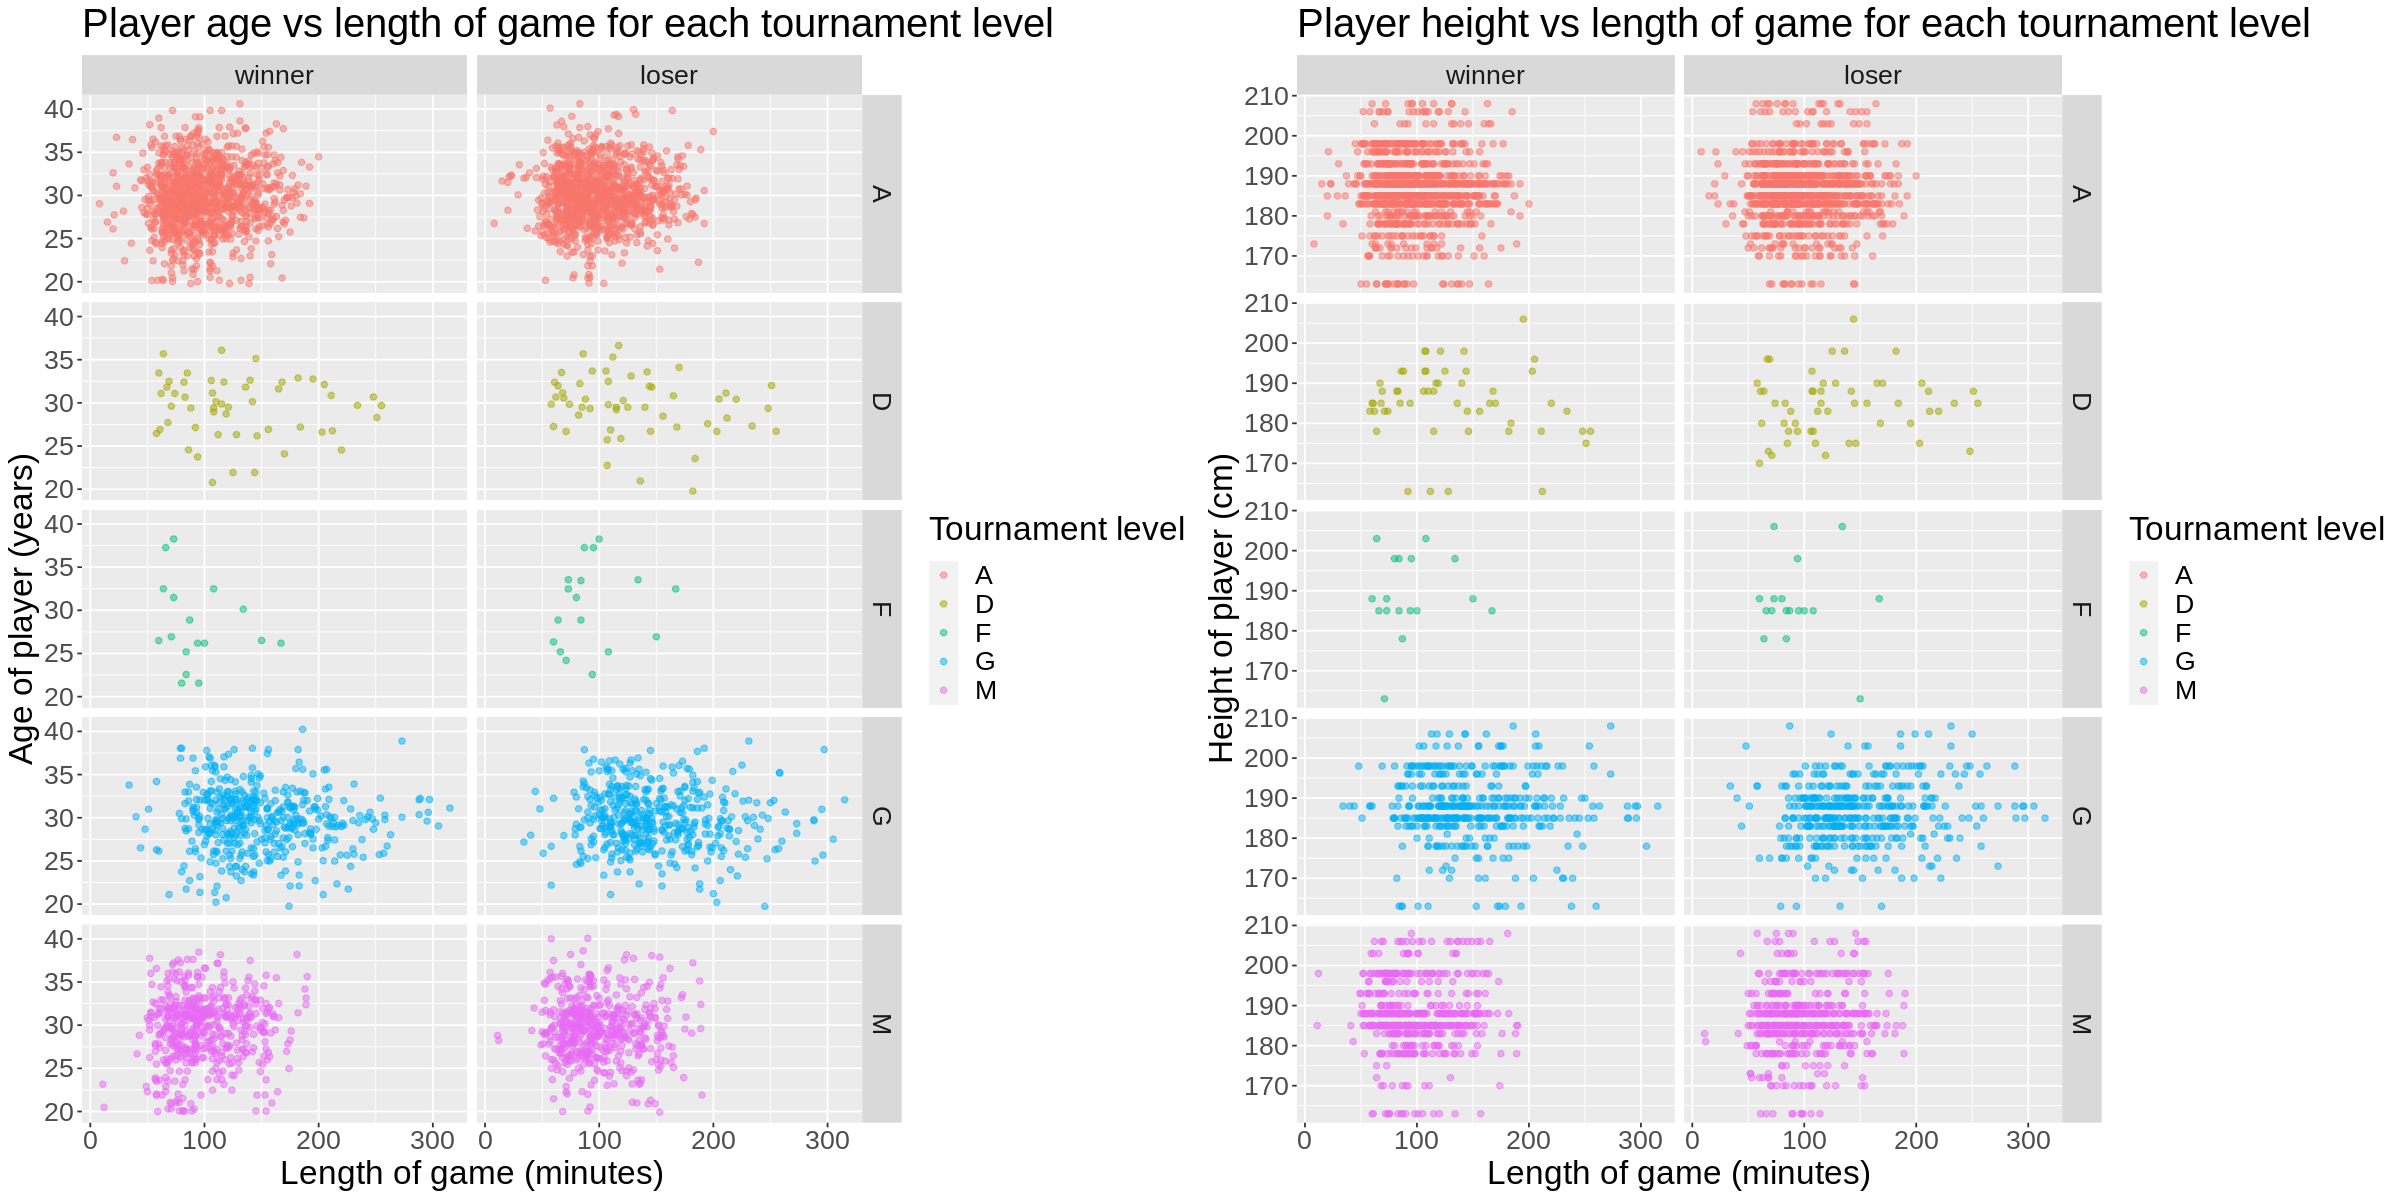

In [22]:
options(repr.plot.width = 20, repr.plot.height = 10)
cowplot::plot_grid(tennis_plot_age, tennis_plot_height)